In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing the Data
#/kaggle/input/housing
df = pd.read_csv("/kaggle/input/housing-new/housing_new.csv")

In [3]:
df.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.6,2.0,4.0,1672416.689
2,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
3,Kogi,Terrace duplex,7.6,5.0,6.0,2600700.898
4,Borno,Mansion,2.6,1.0,3.0,1341750.867


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10029 entries, 0 to 10028
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            10029 non-null  object 
 1   title          10029 non-null  object 
 2   bedroom        10029 non-null  float64
 3   bathroom       10029 non-null  float64
 4   parking_space  10029 non-null  float64
 5   price          10029 non-null  float64
dtypes: float64(4), object(2)
memory usage: 470.2+ KB


In [5]:
list = ["bedroom", "bathroom" , "parking_space"]


for a in list:
    df[a] = df[a].astype(int)

In [6]:
# Descriptive Statistics
pd.options.display.float_format = "{:.2f}".format #Turning the float to 2 decimal place
df.describe()


,bedroom,bathroom,parking_space,price
count,13219.00,13219.00,13219.00,13219.00
mean,4.28,3.12,3.14,2104925.40
std,2.42,1.96,1.54,1024535.02
min,1.00,1.00,1.00,431967.29
25%,2.00,1.00,2.00,1387194.91
50%,4.00,2.00,3.00,1882267.46
75%,6.00,5.00,4.00,2551951.94
max,9.00,7.00,6.00,15502306.69


In [344]:
df[df["price"] < 10_000_000]

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2,2,1,1149999.56
1,Ondo,Apartment,4,2,4,1672416.69
2,Anambra,Detached duplex,5,2,4,2410306.76
3,Kogi,Terrace duplex,7,5,6,2600700.90
4,Borno,Mansion,2,1,3,1341750.87
...,...,...,...,...,...,...
13214,Edo,Bungalow,6,7,4,2367927.86
13215,Kaduna,Apartment,8,7,5,2228516.47
13216,Plateau,Bungalow,8,6,5,2406812.69
13217,Delta,Flat,6,6,1,3348918.72


In [345]:
df = df[df["price"] < 10_000_000]

In [3]:
# Define the threshold values for categorization
low_threshold = 1800000
high_threshold = 2600000

# Categorize 'loc' values based on 'avg_price' thresholds
def categorize_loc(avg_price):
    if avg_price < low_threshold:
        return 'low'
    elif avg_price >= low_threshold and avg_price < high_threshold:
        return 'mid'
    else:
        return 'high'


In [4]:
# Calculate the average price for each title
title_price_range = df.groupby('title')['price'].mean()

# Create a new DataFrame to store the title and its corresponding average price
title_price_range_df = pd.DataFrame({'title': title_price_range.index, 'avg_price': title_price_range.values})

title_price_range_df.sort_values(by='avg_price', inplace=True)


title_price_range_df['title_category'] = title_price_range_df['avg_price'].apply(categorize_loc)

title_column = title_price_range_df.drop("avg_price", axis=1)


# Create a new column 'title_rank' with the rank based on average price
title_price_range_df['title_rank'] = range(1, len(title_price_range_df) + 1)


title_price_range_df

,title,avg_price,title_category,title_rank
2,Cottage,1.319667e+06,low,1
0,Apartment,1.571129e+06,low,2
4,Flat,1.718753e+06,low,3
1,Bungalow,1.737323e+06,low,4
7,Semi-detached duplex,1.907071e+06,mid,5
8,Terrace duplex,1.924635e+06,mid,6
9,Townhouse,2.035690e+06,mid,7
3,Detached duplex,2.191855e+06,mid,8
6,Penthouse,2.603742e+06,high,9
5,Mansion,3.880223e+06,high,10


In [10]:


# Calculate the average price for each title
loc_price_range = df.groupby('loc')['price'].mean()

# Create a new DataFrame to store the title and its corresponding average price
loc_price_range_df = pd.DataFrame({'loc': loc_price_range.index, 'avg_price': loc_price_range.values})

loc_price_range_df.sort_values(by='avg_price', inplace=True)

loc_price_range_df['loc_category'] = loc_price_range_df['avg_price'].apply(categorize_loc)

loc_column = loc_price_range_df.drop("avg_price", axis=1)

# Create a new column 'title_rank' with the rank based on average price
loc_price_range_df['loc_num'] = range(1, len(loc_price_range_df) + 1)


loc_price_range_df

,loc,avg_price,loc_category,loc_num
10,Ebonyi,1.636948e+06,low,1
35,Zamfara,1.644060e+06,low,2
20,Kebbi,1.649366e+06,low,3
32,Sokoto,1.666908e+06,low,4
0,Abia,1.685024e+06,low,5
7,Borno,1.686615e+06,low,6
16,Jigawa,1.703654e+06,low,7
34,Yobe,1.713511e+06,low,8
4,Bauchi,1.726200e+06,low,9
21,Kogi,1.756737e+06,low,10


In [5]:
test = pd.read_csv(r"/kaggle/input/housing-test/Housing_dataset_test.csv")
#sub = pd.read_csv(r"C:\Users\user pc\Downloads\free-ai-classes-in-every-city-hackathon-2023\Sample_submission.csv")

# Data Preprocessing

In [57]:
df.shape

(13219, 6)

In [15]:
test.shape

(6000, 6)

In [12]:
ndf = df.shape[0]
ntest = test.shape[0]

combined = pd.concat([df, test])

combined.head()

,loc,title,bedroom,bathroom,parking_space,price,ID
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,NaN
1,Ondo,Apartment,4.6,2.0,4.0,1672416.689,NaN
2,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,NaN
3,Kogi,Terrace duplex,7.6,5.0,6.0,2600700.898,NaN
4,Borno,Mansion,2.6,1.0,3.0,1341750.867,NaN


In [59]:
combined.shape

(19219, 7)

In [60]:
combined.isnull().sum()

loc                  0
title                0
bedroom              0
bathroom             0
parking_space        0
price             6000
ID               13219
dtype: int64

# Feature Engineering

In [26]:
South_West_Zone = ["Lagos", "Ekiti", "Ogun", "Ondo", "Osun",  "Oyo"]

South_South_Zone = ["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo","Rivers"]

South_East_Zone = ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"]

North_West_Zone = ["Kaduna", "Kano", "Katsina", "Jigawa", "Kebbi", "Sokoto", "Zamfara"]

North_Central_Zone = ["Benue", "Kogi", "Kwara", "Nassarawa", "Niger", "Plateau"]

North_East_Zone = ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba","Yobe"]


combined['loc_by_Zone'] = combined['loc'].apply(lambda x: 1 if x in South_West_Zone
                                                                    else 2 if x in South_South_Zone
                                                                    else 3 if x in South_East_Zone
                                                                    else 4 if x in North_West_Zone
                                                                    else 5 if x in North_Central_Zone
                                                                    else 6 )

In [13]:

# Merge the 'title_category' column back to the original DataFrame based on 'title' column
#combined = pd.merge(combined, title_column[['title', 'title_category']], on='title', how='left')


# Merge the 'loc_category' column back to the original DataFrame based on 'title' column
#combined = pd.merge(combined, loc_column[['loc', 'loc_category']], on='loc', how='left')


# Merge the 'title_rank' column back to the original DataFrame based on 'title' column
combined = pd.merge(combined, title_price_range_df[['title', 'title_rank']], on='title', how='left')

# Merge the 'loc_num' column back to the original DataFrame based on 'loc_' column
combined = pd.merge(combined, loc_price_range_df[['loc', 'loc_num']], on='loc', how='left')

combined.head()


,loc,title,bedroom,bathroom,parking_space,price,ID,title_rank,loc_num
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,NaN,5,19
1,Ondo,Apartment,4.6,2.0,4.0,1672416.689,NaN,2,25
2,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,NaN,8,29
3,Kogi,Terrace duplex,7.6,5.0,6.0,2600700.898,NaN,6,10
4,Borno,Mansion,2.6,1.0,3.0,1341750.867,NaN,10,6


In [14]:
combined["total_size"] = combined['bedroom'] + combined['bathroom'] + combined.parking_space

#combined["houseconvenience"] = combined['bedroom'] / combined['bathroom']
combined.head()

,loc,title,bedroom,bathroom,parking_space,price,ID,title_rank,loc_num,total_size
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,NaN,5,19,5.0
1,Ondo,Apartment,4.6,2.0,4.0,1672416.689,NaN,2,25,10.6
2,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,NaN,8,29,11.0
3,Kogi,Terrace duplex,7.6,5.0,6.0,2600700.898,NaN,6,10,18.6
4,Borno,Mansion,2.6,1.0,3.0,1341750.867,NaN,10,6,6.6


In [14]:
combined["loc"].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Sokoto', 'Jigawa', 'Gombe', 'Zamfara', 'Lagos',
       'Akwa Ibom', 'Ekiti'], dtype=object)

In [15]:
from geopy.geocoders import Nominatim

# Create a Nominatim geocoder instance
geolocator = Nominatim(user_agent="GetLoc")

# List of unique location names
locations = ['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
             'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
             'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Plateau', 'Delta', 'Kano',
             'Yobe', 'Imo', 'Benue', 'Bauchi', 'Cross River', 'Niger',
             'Adamawa', 'Oyo', 'Sokoto', 'Jigawa', 'Gombe', 'Akwa Ibom',
             'Zamfara', 'Lagos', 'Ekiti']

# Create empty lists to store data
location_names = []
addresses = []
latitudes = []
longitudes = []

# Iterate through the unique locations and obtain coordinates
for location_name in locations:
    location = geolocator.geocode(location_name + ", Nigeria")
    
    if location is not None:
        location_names.append(location_name)
        addresses.append(location.address)
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        print("\n")

# Create a DataFrame from the collected data
data = {
    'loc': location_names,
    'Latitude': latitudes,
    'Longitude': longitudes
}

locations_df = pd.DataFrame(data)

In [101]:
locations_df

,loc,Latitude,Longitude
0,Katsina,12.56,7.62
1,Ondo,7.02,5.06
2,Anambra,6.22,6.95
3,Kogi,7.79,6.69
4,Borno,12.19,13.31
5,Kwara,8.84,4.67
6,Osun,7.55,4.50
7,Kaduna,10.38,7.85
8,Ogun,6.98,3.44
9,Bayelsa,4.76,6.03


In [16]:

# Merge the original dataset with the Geopy DataFrame based on "Location Name"
combined = pd.merge(combined, locations_df, on="loc", how="left")


In [17]:
combined.drop(["title","loc"] , inplace=True, axis=1)

In [180]:
#combined.drop("loc_by_Zone" , inplace=True, axis=1)

In [18]:
combined.head()

,bedroom,bathroom,parking_space,price,ID,title_rank,loc_num,total_size,Latitude,Longitude
0,2.0,2.0,1.0,1149999.565,NaN,5,19,5.0,12.563083,7.620706
1,4.6,2.0,4.0,1672416.689,NaN,2,25,10.6,7.020969,5.056748
2,5.0,2.0,4.0,2410306.756,NaN,8,29,11.0,6.218314,6.953184
3,7.6,5.0,6.0,2600700.898,NaN,6,10,18.6,7.794960,6.686867
4,2.6,1.0,3.0,1341750.867,NaN,10,6,6.6,12.187539,13.308003


In [19]:
train = combined[:ndf]
test = combined[ndf:]

In [20]:
train = train.drop("ID",axis=1)

In [21]:
X = train.drop("price",axis=1)
y = train.price
X

,bedroom,bathroom,parking_space,title_rank,loc_num,total_size,Latitude,Longitude
0,2.0,2.0,1.0,5,19,5.0,12.563083,7.620706
1,4.6,2.0,4.0,2,25,10.6,7.020969,5.056748
2,5.0,2.0,4.0,8,29,11.0,6.218314,6.953184
3,7.6,5.0,6.0,6,10,18.6,7.794960,6.686867
4,2.6,1.0,3.0,10,6,6.6,12.187539,13.308003
...,...,...,...,...,...,...,...,...
10024,8.0,1.0,6.0,8,13,15.0,8.014133,10.737634
10025,6.0,7.0,4.2,4,28,17.2,6.607658,5.972271
10026,8.0,7.0,5.0,2,15,20.0,10.382532,7.853323
10027,8.0,6.0,5.0,4,14,19.0,9.058345,9.682629


In [72]:
y

0       1149999.56
1       1672416.69
2       2410306.76
3       2600700.90
4       1341750.87
           ...    
13214   2367927.86
13215   2228516.47
13216   2406812.69
13217   3348918.72
13218   2858516.89
Name: price, Length: 13219, dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Create a Ridge regression model
ridge_model = Ridge()  # You can adjust the value of alpha here

ridge_model.fit(X,y)


# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(ridge_model, X, y, cv=cv, scoring='neg_mean_squared_error'))


# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print('Mean RMSE:', rmse_scores.mean())

Cross-Validation RMSE: [441633.337541   463564.09438566 448084.47607976 541930.11695586
 427780.64526549 461985.49276377 457329.9045772  463849.51749732
 429426.22738999 461599.97795296]
Mean RMSE: 459718.37904090155


In [24]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


# Define the RandomForest model
model = RandomForestRegressor(random_state=42)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Train the model on the entire dataset
model.fit(X, y)

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print('Mean RMSE:', rmse_scores.mean())


Cross-Validation RMSE: [180755.88440082 214993.36943064 165269.06581834 179610.47165498
 154386.18375   ]
Mean RMSE: 179002.99501095485


In [26]:
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Define the CatBoost model
model = CatBoostRegressor(loss_function='RMSE', random_seed=42,silent=True)

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Train the model on the entire dataset
model.fit(X, y)

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print(rmse_scores.mean())

Cross-Validation RMSE: [128296.27781719 190892.18730385 214814.73176625 173038.05057355
 156131.62243364 122283.66494289 169695.23178948 133535.44941206
 123436.75016873 154362.59810088]
156648.65643085397


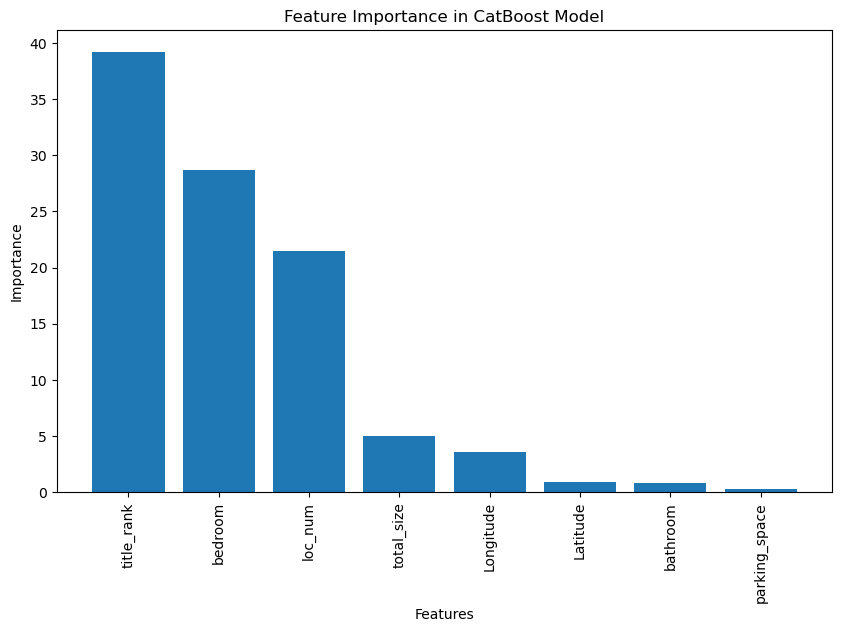

In [27]:
# Feature importance plot
import matplotlib.pyplot as plt
feature_importance = model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame to store feature importance results
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sort the DataFrame by feature importance values
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()

In [28]:
test = test.drop('price',axis=1)

In [29]:
test = test.drop("ID",axis=1)

In [30]:
test.shape

(6000, 8)

In [31]:
Submission = model.predict(test)
Submission

array([2380801.15112734, 1033549.01792681, 1226772.7274371 , ...,
       2003734.00148563, 1309509.03575763, 3399468.9514702 ])

In [32]:
y_pred_test = pd.Series(Submission)
y_pred_test.head().apply(("{0:.5f}".format))

0    2380801.15113
1    1033549.01793
2    1226772.72744
3    8813578.20804
4    1869020.56800
dtype: object

In [33]:
sub = pd.read_csv(r"/kaggle/input/sample-submission/Sample_submission.csv")

In [34]:
pred = pd.DataFrame({"price": y_pred_test})
sub["price"] = pred["price"]
sub.head()

,ID,price
0,845,2.380801e+06
1,1924,1.033549e+06
2,10718,1.226773e+06
3,12076,8.813578e+06
4,12254,1.869021e+06


In [29]:
sub.head()

,ID,price
0,845,2.427601e+06
1,1924,1.036444e+06
2,10718,1.233255e+06
3,12076,8.934414e+06
4,12254,1.900927e+06


In [35]:
sub.to_csv("Submission36.csv",index=False)